In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel('Data_Train.xlsx')
test=pd.read_excel('Data_Test.xlsx')


In [3]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [5]:
df['STORY'].nunique()

7548

In [6]:
df['SECTION'].nunique()

4

In [7]:
df['text length'] = df['STORY'].apply(len)

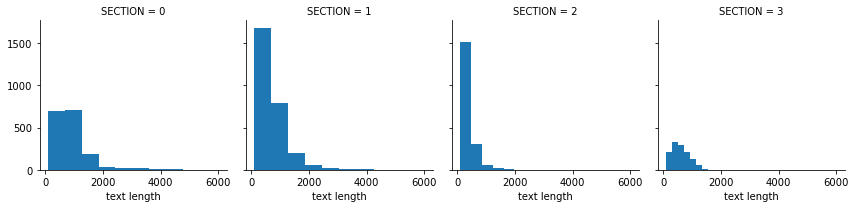

In [8]:
g = sns.FacetGrid(df,col='SECTION')
g.map(plt.hist,'text length')

<AxesSubplot:xlabel='SECTION', ylabel='count'>

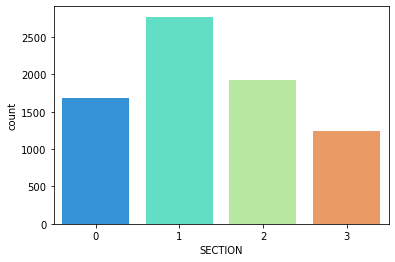

In [9]:
sns.countplot(x='SECTION',data=df,palette='rainbow')

In [10]:
X = df['STORY']
y = df['SECTION']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [12]:
X = cv.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [16]:
nb.fit(X_train,y_train)

MultinomialNB()

In [17]:
predictions = nb.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[483   8   2   5]
 [ 10 815   3   5]
 [ 22  18 526   1]
 [  1   2   0 388]]


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       498
           1       0.97      0.98      0.97       833
           2       0.99      0.93      0.96       567
           3       0.97      0.99      0.98       391

    accuracy                           0.97      2289
   macro avg       0.97      0.97      0.97      2289
weighted avg       0.97      0.97      0.97      2289



In [20]:
X1 = test['STORY']
X1 = cv.transform(X1)
test_predict=nb.predict(X1)
print(test_predict)

[1 2 1 ... 1 0 1]


In [21]:
y_test_pred = pd.DataFrame(test_predict,columns=[   'SECTION'   ])

In [22]:
y_test_pred.to_csv('PREDCTIONS.csv', index=False)